In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
os.chdir('/home/ankushraut/Downloads/McKinsey Analytics')

In [685]:
training_data = pd.read_csv('train_data.csv')
len(training_data)

48120

In [686]:
training_data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [687]:
training_data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [688]:
test_data = pd.read_csv('test_data.csv')

In [689]:
test_data.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [690]:
test_data.Junction.value_counts()

4    2952
3    2952
2    2952
1    2952
Name: Junction, dtype: int64

In [691]:
#extracting information from datetime
training_data['DateTime'] = pd.to_datetime(training_data['DateTime'])
training_data['hour'] = training_data['DateTime'].dt.hour
training_data['weekday'] = training_data['DateTime'].dt.weekday
training_data['month'] = training_data['DateTime'].dt.month

test_data['DateTime'] = pd.to_datetime(test_data['DateTime'])
test_data['hour'] = test_data['DateTime'].dt.hour
test_data['weekday'] = test_data['DateTime'].dt.weekday
test_data['month'] = test_data['DateTime'].dt.month

In [692]:
training_data = training_data.drop(labels = ['DateTime', 'ID'], axis = 1)
test_data = test_data.drop(labels = ['DateTime'], axis = 1)

In [693]:
submission = pd.read_csv('submission.csv')

In [694]:
submission.head()

,ID,Vehicles


In [695]:
training_data1 = training_data[training_data.Junction == 1].reset_index(drop = True)
test_data1 = test_data[test_data.Junction == 1].reset_index(drop = True)
id1 = test_data1['ID']
test_data1 = test_data1.drop(labels = ['ID', 'Junction'], axis = 1)
training_data1 = training_data1.drop(labels = ['Junction'], axis = 1)

training_data2 = training_data[training_data.Junction == 2].reset_index(drop = True)
test_data2 = test_data[test_data.Junction == 2].reset_index(drop = True)
id2 = test_data2['ID']
test_data2 = test_data2.drop(labels = ['ID', 'Junction'], axis = 1)
training_data2 = training_data2.drop(labels = ['Junction'], axis = 1)

training_data3 = training_data[training_data.Junction == 3].reset_index(drop = True)
test_data3 = test_data[test_data.Junction == 3].reset_index(drop = True)
id3 = test_data3['ID']
test_data3 = test_data3.drop(labels = ['ID', 'Junction'], axis = 1)
training_data3 = training_data3.drop(labels = ['Junction'], axis = 1)

training_data4 = training_data[training_data.Junction == 4].reset_index(drop = True)
test_data4 = test_data[test_data.Junction == 4].reset_index(drop = True)
id4 = test_data4['ID']
test_data4 = test_data4.drop(labels = ['ID', 'Junction'], axis = 1)
training_data4 = training_data4.drop(labels = ['Junction'], axis = 1)

In [696]:
training_data4.head()

,Vehicles,hour,weekday,month
0,3,0,6,1
1,1,1,6,1
2,4,2,6,1
3,4,3,6,1
4,2,4,6,1


In [697]:
#for junction 1

training1 = training_data1.drop(labels = ['Vehicles'], axis = 1)
reg_variable1 = training_data1['Vehicles']

In [698]:
#sampling the distribution
from sklearn.model_selection import train_test_split
x_data1, x_test1, y_data1, y_test1 = train_test_split(training1, reg_variable1, test_size = 0.1, random_state = 0)
x_data1 = x_data1.reset_index(drop = True)
y_data1 = y_data1.reset_index(drop = True)
x_test1 = x_test1.reset_index(drop = True)
y_test1 = y_test1.reset_index(drop = True)

In [699]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(x_data1, y_data1, test_size = 0.25, random_state = 0)
x_train1 = x_train1.reset_index(drop = True)
x_val1 = x_val1.reset_index(drop = True)
y_train1 = y_train1.reset_index(drop = True)
y_val1 = y_val1.reset_index(drop = True)

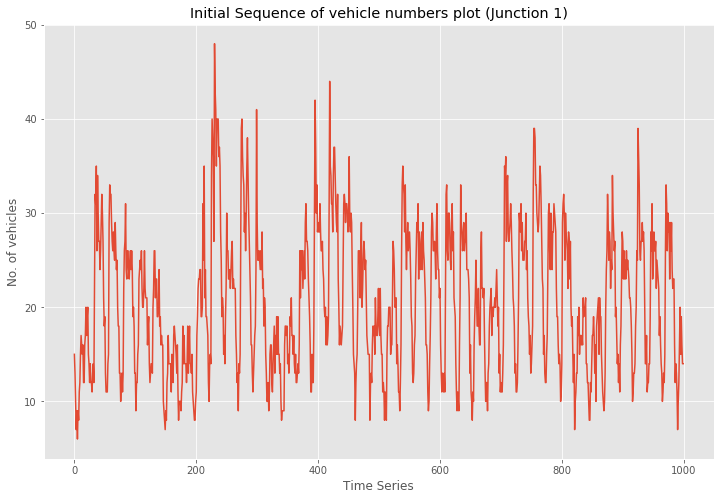

In [700]:
plt.figure(figsize = (12,8))
plt.plot(training_data1.Vehicles[:1000])
plt.title('Initial Sequence of vehicle numbers plot (Junction 1)')
plt.xlabel('Time Series')
plt.ylabel('No. of vehicles')
plt.show()

In [701]:
#Hence, we're supposed to predict the number of vehicles using the timestamp and junction value, since there's a mix of 
#the type of features we need to use, a tree-based model would be the best thing to do

#XGBoost
import xgboost as xgb
params1 = {"objective":"reg:linear",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 3,
         "subsample":0.9,
         "silent":0,
         "seed":0,
         "lambda":0,
         "alpha":70
         }

num_boost_round1 = 100


x_tr1 = x_train1
y_tr1 = y_train1

dtrain1 = xgb.DMatrix(x_tr1, y_tr1)
dvalid1 = xgb.DMatrix(x_val1, y_val1)

watchlist1 = [(dtrain1, 'train'), (dvalid1, 'eval')]

booster1 = xgb.train(params1, dtrain1, num_boost_round1, evals = watchlist1)

dtest1 = xgb.DMatrix(x_test1)

predictions1 = booster1.predict(dtest1)
predicted_values1 = []
for i in range(len(x_test1)):
    predicted_values1.append(predictions1[i])

[0]	train-rmse:45.8175	eval-rmse:45.7678
[1]	train-rmse:41.9868	eval-rmse:41.9161
[2]	train-rmse:38.6109	eval-rmse:38.5211
[3]	train-rmse:35.6275	eval-rmse:35.5183
[4]	train-rmse:33.0179	eval-rmse:32.8875
[5]	train-rmse:30.734	eval-rmse:30.5849
[6]	train-rmse:28.7446	eval-rmse:28.5765
[7]	train-rmse:27.0252	eval-rmse:26.8396
[8]	train-rmse:25.5405	eval-rmse:25.3346
[9]	train-rmse:24.255	eval-rmse:24.036
[10]	train-rmse:23.1647	eval-rmse:22.9284
[11]	train-rmse:22.2315	eval-rmse:21.9763
[12]	train-rmse:21.4415	eval-rmse:21.18
[13]	train-rmse:20.7774	eval-rmse:20.5063
[14]	train-rmse:20.2214	eval-rmse:19.9398
[15]	train-rmse:19.7471	eval-rmse:19.4612
[16]	train-rmse:19.3426	eval-rmse:19.0483
[17]	train-rmse:18.9859	eval-rmse:18.6937
[18]	train-rmse:18.7039	eval-rmse:18.4057
[19]	train-rmse:18.4254	eval-rmse:18.1242
[20]	train-rmse:18.2048	eval-rmse:17.9049
[21]	train-rmse:18.0414	eval-rmse:17.7422
[22]	train-rmse:17.8737	eval-rmse:17.5737
[23]	train-rmse:17.758	eval-rmse:17.4607
[24]	tra

In [702]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test1, predicted_values1)**0.5)

16.9556742928


In [703]:
#for junction 2

training2 = training_data2.drop(labels = ['Vehicles'], axis = 1)
reg_variable2 = training_data2['Vehicles']

#sampling the distribution

x_data2, x_test2, y_data2, y_test2 = train_test_split(training2, reg_variable2, test_size = 0.1, random_state = 0)
x_data2 = x_data2.reset_index(drop = True)
y_data2 = y_data2.reset_index(drop = True)
x_test2 = x_test2.reset_index(drop = True)
y_test2 = y_test2.reset_index(drop = True)

x_train2, x_val2, y_train2, y_val2 = train_test_split(x_data2, y_data2, test_size = 0.25, random_state = 0)
x_train2 = x_train2.reset_index(drop = True)
x_val2 = x_val2.reset_index(drop = True)
y_train2 = y_train2.reset_index(drop = True)
y_val2 = y_val2.reset_index(drop = True)

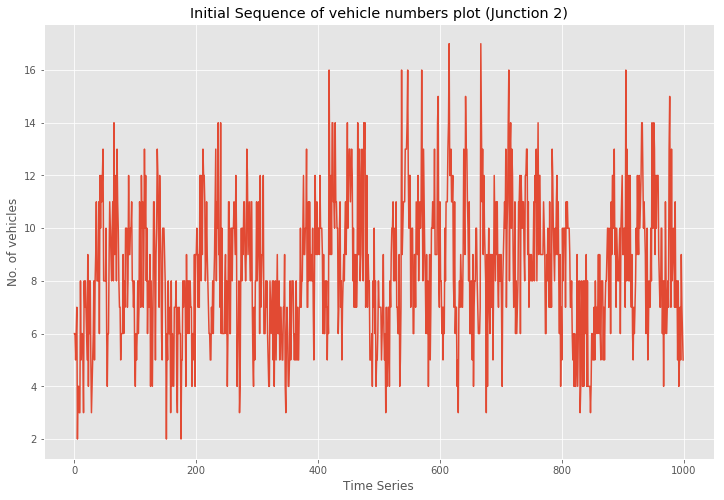

In [704]:
plt.figure(figsize = (12,8))
plt.plot(training_data2.Vehicles[:1000])
plt.title('Initial Sequence of vehicle numbers plot (Junction 2)')
plt.xlabel('Time Series')
plt.ylabel('No. of vehicles')
plt.show()

In [705]:
params2 = {"objective":"reg:linear",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 4,
         "subsample":0.85,
         "silent":0,
         "seed":0,
         "lambda":0.1,
         "alpha":75
         }

num_boost_round2 = 100


x_tr2 = x_train2
y_tr2 = y_train2

dtrain2 = xgb.DMatrix(x_tr2, y_tr2)
dvalid2 = xgb.DMatrix(x_val2, y_val2)

watchlist2 = [(dtrain2, 'train'), (dvalid2, 'eval')]

booster2 = xgb.train(params2, dtrain2, num_boost_round2, evals = watchlist2)

dtest2 = xgb.DMatrix(x_test2)

predictions2 = booster2.predict(dtest2)
predicted_values2 = []
for i in range(len(x_test2)):
    predicted_values2.append(predictions2[i])
    
print(mean_squared_error(y_test2, predicted_values2)**0.5)

[0]	train-rmse:14.2765	eval-rmse:14.3558
[1]	train-rmse:13.1043	eval-rmse:13.182
[2]	train-rmse:12.0696	eval-rmse:12.1378
[3]	train-rmse:11.1541	eval-rmse:11.2201
[4]	train-rmse:10.3501	eval-rmse:10.4131
[5]	train-rmse:9.64721	eval-rmse:9.71094
[6]	train-rmse:9.03072	eval-rmse:9.08789
[7]	train-rmse:8.501	eval-rmse:8.54989
[8]	train-rmse:8.0414	eval-rmse:8.08722
[9]	train-rmse:7.63482	eval-rmse:7.67783
[10]	train-rmse:7.29634	eval-rmse:7.33438
[11]	train-rmse:7.00182	eval-rmse:7.03438
[12]	train-rmse:6.7552	eval-rmse:6.78231
[13]	train-rmse:6.54476	eval-rmse:6.56924
[14]	train-rmse:6.36885	eval-rmse:6.38796
[15]	train-rmse:6.21142	eval-rmse:6.23239
[16]	train-rmse:6.08826	eval-rmse:6.10734
[17]	train-rmse:5.97944	eval-rmse:5.99375
[18]	train-rmse:5.88553	eval-rmse:5.90007
[19]	train-rmse:5.80893	eval-rmse:5.82159
[20]	train-rmse:5.7471	eval-rmse:5.75824
[21]	train-rmse:5.69482	eval-rmse:5.70433
[22]	train-rmse:5.64418	eval-rmse:5.65264
[23]	train-rmse:5.60772	eval-rmse:5.61524
[24]	tra

In [706]:
#for junction 3

training3 = training_data3.drop(labels = ['Vehicles'], axis = 1)
reg_variable3 = training_data3['Vehicles']

#sampling the distribution

x_data3, x_test3, y_data3, y_test3 = train_test_split(training3, reg_variable3, test_size = 0.1, random_state = 0)
x_data3 = x_data3.reset_index(drop = True)
y_data3 = y_data3.reset_index(drop = True)
x_test3 = x_test3.reset_index(drop = True)
y_test3 = y_test3.reset_index(drop = True)

x_train3, x_val3, y_train3, y_val3 = train_test_split(x_data3, y_data3, test_size = 0.25, random_state = 0)
x_train3 = x_train3.reset_index(drop = True)
x_val3 = x_val3.reset_index(drop = True)
y_train3 = y_train3.reset_index(drop = True)
y_val3 = y_val3.reset_index(drop = True)

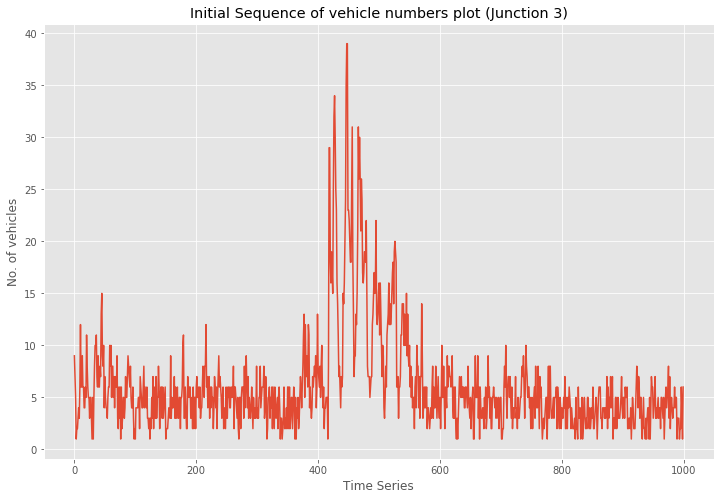

In [707]:
plt.figure(figsize = (12,8))
plt.plot(training_data3.Vehicles[:1000])
plt.title('Initial Sequence of vehicle numbers plot (Junction 3)')
plt.xlabel('Time Series')
plt.ylabel('No. of vehicles')
plt.show()

In [708]:
params3 = {"objective":"reg:linear",
          "booster":"gbtree",
          "eta":0.1,
          "max_depth": 4,
         "subsample":0.75,
         "silent":0,
         "seed":0,
         "lambda":0,
         "alpha":70
         }

num_boost_round3 = 200


x_tr3 = x_train3
y_tr3 = y_train3

dtrain3 = xgb.DMatrix(x_tr3, y_tr3)
dvalid3 = xgb.DMatrix(x_val3, y_val3)

watchlist3 = [(dtrain3, 'train'), (dvalid3, 'eval')]

booster3 = xgb.train(params3, dtrain3, num_boost_round3, evals = watchlist3)

dtest3 = xgb.DMatrix(x_test3)

predictions3 = booster3.predict(dtest3)
predicted_values3 = []
for i in range(len(x_test3)):
    predicted_values3.append(predictions3[i])
    
print(mean_squared_error(y_test3, predicted_values3)**0.5)

[0]	train-rmse:15.8472	eval-rmse:15.1495
[1]	train-rmse:14.8112	eval-rmse:14.0922
[2]	train-rmse:13.9249	eval-rmse:13.1893
[3]	train-rmse:13.1643	eval-rmse:12.4178
[4]	train-rmse:12.495	eval-rmse:11.7417
[5]	train-rmse:11.9358	eval-rmse:11.175
[6]	train-rmse:11.4678	eval-rmse:10.6992
[7]	train-rmse:11.0654	eval-rmse:10.2927
[8]	train-rmse:10.7259	eval-rmse:9.94888
[9]	train-rmse:10.4257	eval-rmse:9.6564
[10]	train-rmse:10.191	eval-rmse:9.4225
[11]	train-rmse:9.99591	eval-rmse:9.23054
[12]	train-rmse:9.83114	eval-rmse:9.0713
[13]	train-rmse:9.69471	eval-rmse:8.94334
[14]	train-rmse:9.57902	eval-rmse:8.83499
[15]	train-rmse:9.47941	eval-rmse:8.74225
[16]	train-rmse:9.39208	eval-rmse:8.66752
[17]	train-rmse:9.31887	eval-rmse:8.59763
[18]	train-rmse:9.25982	eval-rmse:8.54185
[19]	train-rmse:9.21522	eval-rmse:8.50389
[20]	train-rmse:9.16679	eval-rmse:8.46478
[21]	train-rmse:9.11246	eval-rmse:8.42131
[22]	train-rmse:9.07238	eval-rmse:8.39008
[23]	train-rmse:9.04687	eval-rmse:8.37116
[24]	tra

[195]	train-rmse:8.54404	eval-rmse:8.1657
[196]	train-rmse:8.54333	eval-rmse:8.16604
[197]	train-rmse:8.54305	eval-rmse:8.16637
[198]	train-rmse:8.54255	eval-rmse:8.16633
[199]	train-rmse:8.54228	eval-rmse:8.16567
8.29771012052


In [709]:
#for junction 4

training4 = training_data4.drop(labels = ['Vehicles'], axis = 1)
reg_variable4 = training_data4['Vehicles']

#sampling the distribution

x_data4, x_test4, y_data4, y_test4 = train_test_split(training4, reg_variable4, test_size = 0.1, random_state = 0)
x_data4 = x_data4.reset_index(drop = True)
y_data4 = y_data4.reset_index(drop = True)
x_test4 = x_test4.reset_index(drop = True)
y_test4 = y_test4.reset_index(drop = True)

x_train4, x_val4, y_train4, y_val4 = train_test_split(x_data4, y_data4, test_size = 0.25, random_state = 0)
x_train4 = x_train4.reset_index(drop = True)
x_val4 = x_val4.reset_index(drop = True)
y_train4 = y_train4.reset_index(drop = True)
y_val4 = y_val4.reset_index(drop = True)

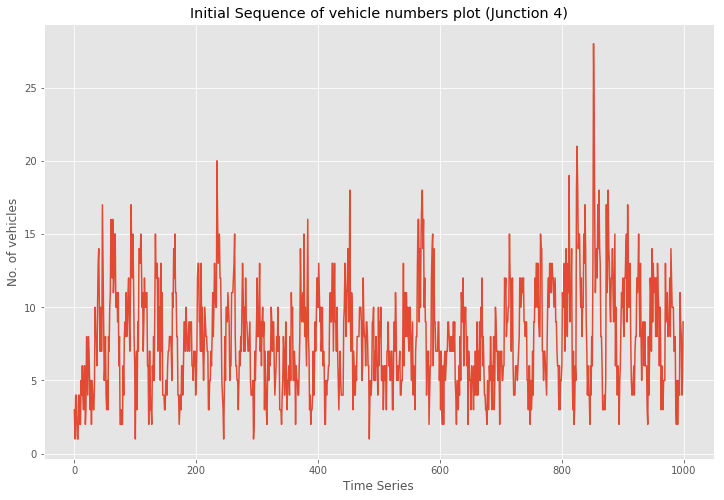

In [710]:
plt.figure(figsize = (12,8))
plt.plot(training_data4[:1000].Vehicles)
plt.title('Initial Sequence of vehicle numbers plot (Junction 4)')
plt.xlabel('Time Series')
plt.ylabel('No. of vehicles')
plt.show()

In [711]:
params4 = {"objective":"reg:linear",
          "booster":"gbtree",
          "eta":0.3,
          "max_depth": 5,
         "subsample":0.85,
         "silent":0,
         "seed":0,
         "lambda":0,
         "alpha":60
         }

num_boost_round4 = 200


x_tr4 = x_train4
y_tr4 = y_train4

dtrain4 = xgb.DMatrix(x_tr4, y_tr4)
dvalid4 = xgb.DMatrix(x_val4, y_val4)

watchlist4 = [(dtrain4, 'train'), (dvalid4, 'eval')]

booster4 = xgb.train(params4, dtrain4, num_boost_round4, evals = watchlist4)

dtest4 = xgb.DMatrix(x_test4)

predictions4 = booster4.predict(dtest4)
predicted_values4 = []
for i in range(len(x_test4)):
    predicted_values4.append(predictions4[i])
    
print(mean_squared_error(y_test4, predicted_values4)**0.5)

[0]	train-rmse:5.6858	eval-rmse:5.80325
[1]	train-rmse:4.46855	eval-rmse:4.58818
[2]	train-rmse:3.7189	eval-rmse:3.845
[3]	train-rmse:3.26831	eval-rmse:3.40979
[4]	train-rmse:2.97198	eval-rmse:3.10545
[5]	train-rmse:2.78984	eval-rmse:2.91089
[6]	train-rmse:2.69694	eval-rmse:2.80948
[7]	train-rmse:2.62238	eval-rmse:2.71974
[8]	train-rmse:2.58608	eval-rmse:2.68825
[9]	train-rmse:2.55646	eval-rmse:2.66033
[10]	train-rmse:2.54357	eval-rmse:2.64617
[11]	train-rmse:2.53425	eval-rmse:2.64004
[12]	train-rmse:2.52424	eval-rmse:2.62839
[13]	train-rmse:2.52099	eval-rmse:2.62644
[14]	train-rmse:2.512	eval-rmse:2.61288
[15]	train-rmse:2.50486	eval-rmse:2.60217
[16]	train-rmse:2.50132	eval-rmse:2.59529
[17]	train-rmse:2.49454	eval-rmse:2.58541
[18]	train-rmse:2.49312	eval-rmse:2.58545
[19]	train-rmse:2.49016	eval-rmse:2.58193
[20]	train-rmse:2.48657	eval-rmse:2.58058
[21]	train-rmse:2.48506	eval-rmse:2.57794
[22]	train-rmse:2.48432	eval-rmse:2.5779
[23]	train-rmse:2.48407	eval-rmse:2.57791
[24]	trai

[194]	train-rmse:2.4425	eval-rmse:2.53984
[195]	train-rmse:2.44244	eval-rmse:2.53975
[196]	train-rmse:2.44244	eval-rmse:2.53975
[197]	train-rmse:2.44237	eval-rmse:2.54021
[198]	train-rmse:2.44227	eval-rmse:2.53952
[199]	train-rmse:2.44227	eval-rmse:2.53952
2.71208387028


In [712]:
submission_values1 = booster1.predict(xgb.DMatrix(test_data1))
sub_values1 = []
for i in range(len(test_data1)):
    sub_values1.append(submission_values1[i])
    
submission_values2 = booster2.predict(xgb.DMatrix(test_data2))
sub_values2 = []
for i in range(len(test_data2)):
    sub_values2.append(submission_values2[i])
    
submission_values3 = booster3.predict(xgb.DMatrix(test_data3))
sub_values3 = []
for i in range(len(test_data3)):
    sub_values3.append(submission_values3[i])
    
submission_values4 = booster4.predict(xgb.DMatrix(test_data4))
sub_values4 = []
for i in range(len(test_data4)):
    sub_values4.append(submission_values4[i])

In [713]:
l1 = pd.DataFrame({'ID':id1, 'Vehicles':sub_values1})
l2 = pd.DataFrame({'ID':id2, 'Vehicles':sub_values2})
l3 = pd.DataFrame({'ID':id3, 'Vehicles':sub_values3})
l4 = pd.DataFrame({'ID':id4, 'Vehicles':sub_values4})

In [714]:
final_submission = pd.concat([l1, l2, l3, l4])
final_submission.to_csv('sub2.csv')